# Locating Grocery Store Locations on a Map

# Step 1: Construct Datatable

In [1]:
#Import proper plugins
import pandas as pd

#Read file as database
def read_dataframe(filename, columns):
    df = pd.read_csv(filename, names = columns)
    return df[1:]


food_retailers_df = read_dataframe('mapc.food_retailers_2017_pt.csv', ['object id', 'name', 'address', 'address2', 'municipal', 
                                                                          'state', 'zipcode', 'recordtype', 'data_year', 'source', 
                                                                            'market_id','ebt', 'coupons', 'latitude', 'longitude'
                                                                            , 'prim_type', 'shape'])
food_retailers_df

,object id,name,address,address2,municipal,state,zipcode,recordtype,data_year,source,market_id,ebt,coupons,latitude,longitude,prim_type,shape
1,1,7-Eleven,462 Washington St,,Brighton,MA,02135,Unverified,2016,ReferenceUSA,0,,,42.34852700,-71.15896000,Convenience Stores,2400000001000000010004006A6900000C000000010000...
2,2,7-Eleven,131 Middlesex Tpke,,Burlington,MA,01803,Unverified,2016,ReferenceUSA,0,,,42.48796500,-71.22174300,Convenience Stores,2400000001000000010004006A6900000C000000010000...
3,3,7-Eleven,226 Winthrop Ave,,Lawrence,MA,01843,Unverified,2016,ReferenceUSA,0,,,42.68601900,-71.13976900,Convenience Stores,2400000001000000010004006A6900000C000000010000...
4,4,7-Eleven,1693 Route 6,,Somerset,MA,02726,Unverified,2016,ReferenceUSA,0,,,41.75438100,-71.15186600,Convenience Stores,2400000001000000010004006A6900000C000000010000...
5,5,7-Eleven,226 Broadway,,Taunton,MA,02780,Unverified,2016,ReferenceUSA,0,,,41.92046700,-71.09132000,Convenience Stores,2400000001000000010004006A6900000C000000010000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,9571,Target,180 Somerville Ave,,Somerville,MA,02143,,2016,infoUSA,0,,,42.37647800,-71.09055900,Department Stores (Except Discount Dept Stores),2400000001000000010004006A6900000C000000010000...
9572,9572,Target,1341 Boylston St,,Boston,MA,02215,,2016,infoUSA,0,,,42.34438000,-71.09966000,Department Stores (Except Discount Dept Stores),2400000001000000010004006A6900000C000000010000...
9573,9573,Target,41 Robert Dr,,South Easton,MA,02375,,2016,infoUSA,0,,,42.02736400,-71.14357000,Department Stores (Except Discount Dept Stores),2400000001000000010004006A6900000C000000010000...
9574,9574,Target,579 Gar Hwy # 5,,Swansea,MA,02777,,2016,infoUSA,0,,,41.74909500,-71.20669600,Department Stores (Except Discount Dept Stores),2400000001000000010004006A6900000C000000010000...


# Step 2: Drop Columns

In [2]:
#Decide what columns that we want to keep

keep_columns = ['name','address', 'municipal','latitude', 'longitude', 'prim_type']

names = ['object id', 'name', 'address', 'address2', 'municipal', 'state', 'zipcode', 'recordtype', 'data_year', 'source', 'market_id','ebt', 'coupons', 'latitude', 'longitude', 'prim_type', 'shape']

#Find which columns that we want to drop
def filtered_columns(dataframe, desired_columns, all_columns):
    drop_columns = []
    for column in all_columns:
        if column not in desired_columns:
            drop_columns.append(column)
    #Drop unwanted columns from database
    return dataframe.drop(drop_columns, axis = 1)

filtered_food_retailers_df = filtered_columns(food_retailers_df, keep_columns, names)

filtered_food_retailers_df


,name,address,municipal,latitude,longitude,prim_type
1,7-Eleven,462 Washington St,Brighton,42.34852700,-71.15896000,Convenience Stores
2,7-Eleven,131 Middlesex Tpke,Burlington,42.48796500,-71.22174300,Convenience Stores
3,7-Eleven,226 Winthrop Ave,Lawrence,42.68601900,-71.13976900,Convenience Stores
4,7-Eleven,1693 Route 6,Somerset,41.75438100,-71.15186600,Convenience Stores
5,7-Eleven,226 Broadway,Taunton,41.92046700,-71.09132000,Convenience Stores
...,...,...,...,...,...,...
9571,Target,180 Somerville Ave,Somerville,42.37647800,-71.09055900,Department Stores (Except Discount Dept Stores)
9572,Target,1341 Boylston St,Boston,42.34438000,-71.09966000,Department Stores (Except Discount Dept Stores)
9573,Target,41 Robert Dr,South Easton,42.02736400,-71.14357000,Department Stores (Except Discount Dept Stores)
9574,Target,579 Gar Hwy # 5,Swansea,41.74909500,-71.20669600,Department Stores (Except Discount Dept Stores)


# Step 3: Defining Boston

In [3]:
municipal_boston = ['Allston', 'Back Bay', 'Bay Village', 'Beacon Hill', 'Brighton', 'Charlestown',
                   'Chinatown', 'Dorchester', 'Downtown', 'East Boston', 'Fenway Kenmore', 
                    'Longwood', 'Hyde Park', 'Jamaica Plain', 'Mattapan', 'Mission Hill',
                   'North End', 'Roslindale', 'Roxbury', 'South Boston', 'South End', 
                   'West End', 'West Roxbury']


# Step 4: Filters Rows by Munipicies and by Retailer Type 

In [4]:
## 
Area = municipal_boston + ["Boston"]

#Filter rows by speficied mulipicy and retailer type 
def filtered_rows(area, prim_type):
    update_1 = filtered_food_retailers_df[filtered_food_retailers_df.municipal == area[0]]
    for municipal in area[1:]:
        update_0 = filtered_food_retailers_df[filtered_food_retailers_df.municipal == municipal]
        update_1 = pd.concat([update_1, update_0])
    update_2 = update_1[update_1.prim_type == prim_type]
    return update_2
    
boston_supermarkets = filtered_rows(Area, 'Supermarkets/Other Grocery (Exc Convenience) Strs')
boston_convenience = filtered_rows(Area, 'Convenience Stores')

boston_supermarkets


,name,address,municipal,latitude,longitude,prim_type
5118,7-Eleven,121 Harvard Ave,Allston,42.35241700,-71.13219200,Supermarkets/Other Grocery (Exc Convenience) Strs
5185,Allston Food & Spirits,225 Cambridge St,Allston,42.35791700,-71.12672700,Supermarkets/Other Grocery (Exc Convenience) Strs
5186,Allston Market,169 Harvard Ave,Allston,42.35126100,-71.13156900,Supermarkets/Other Grocery (Exc Convenience) Strs
5193,Alpha Trio Mfg Corp,280 Lincoln St,Allston,42.35732800,-71.13407300,Supermarkets/Other Grocery (Exc Convenience) Strs
5471,Cozmo Market,205 Harvard Ave,Allston,42.34993100,-71.13080400,Supermarkets/Other Grocery (Exc Convenience) Strs
...,...,...,...,...,...,...
9092,Whole Foods Market,161 Cambridge St,Boston,42.36210700,-71.06600900,Supermarkets/Other Grocery (Exc Convenience) Strs
9093,Whole Foods Market,181 Cambridge St,Boston,42.36126400,-71.06589200,Supermarkets/Other Grocery (Exc Convenience) Strs
9094,Whole Foods Market,310 Harrison Ave # 348,Boston,42.34568000,-71.06330800,Supermarkets/Other Grocery (Exc Convenience) Strs
9095,Whole Foods Market,348 Harrison Ave,Boston,42.34486000,-71.06363100,Supermarkets/Other Grocery (Exc Convenience) Strs


In [5]:
boston_convenience

,name,address,municipal,latitude,longitude,prim_type
40,7-Eleven,509 Cambridge St,Allston,42.35343200,-71.13848200,Convenience Stores
93,Acougue Brasil Convenient Str,192 Brighton Ave,Allston,42.35307400,-71.13426700,Convenience Stores
101,After Seven,1310 Commonwealth Ave,Allston,42.34846700,-71.13425000,Convenience Stores
123,Allston Convenience Store,165 Allston St,Allston,42.34778200,-71.13815700,Convenience Stores
259,Brazilian Corner,192 Brighton Ave,Allston,42.35307400,-71.13426700,Convenience Stores
...,...,...,...,...,...,...
3134,City Convenience,702 Commonwealth Ave,Boston,42.34972700,-71.10535500,Convenience Stores
3135,City Convenience,775 Commonwealth Ave,Boston,42.35051000,-71.10965700,Convenience Stores
3150,Tedeschi Food Shops,177 State St # A,Boston,42.35937000,-71.05339400,Convenience Stores
9192,H-H Convenience,Downtown Crossing Mbta Station,Boston,42.35797900,-71.06256400,Convenience Stores


# Step 5: Contruct Geopanda Dataframes from existing Pandas Dataframes

In [6]:
##
#Import necessary plugins

#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

#Convert pandas dataframe into geodataframe, forming one column for coordinates
def construct_coordinates(dataframe):
    dataframe['longitude'] = dataframe['longitude'].astype(float) #Added to fix type - Might be unneeded
    dataframe['latitude'] = dataframe['latitude'].astype(float) #Added to fix type - Might be unneeded
    geometry = gpd.points_from_xy(dataframe.longitude , dataframe.latitude)
    crs = {'init': 'epsg:3857'} #might have crs - Might be changed to fit map?
    stores_gdf = gpd.GeoDataFrame(dataframe, crs = crs, geometry = geometry)
    return stores_gdf

boston_supermarkets_gdf = construct_coordinates(boston_supermarkets)
boston_convenience_gdf = construct_coordinates(boston_convenience)

boston_supermarkets_gdf


,name,address,municipal,latitude,longitude,prim_type,geometry
5118,7-Eleven,121 Harvard Ave,Allston,42.352417,-71.132192,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.13219 42.35242)
5185,Allston Food & Spirits,225 Cambridge St,Allston,42.357917,-71.126727,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.12673 42.35792)
5186,Allston Market,169 Harvard Ave,Allston,42.351261,-71.131569,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.13157 42.35126)
5193,Alpha Trio Mfg Corp,280 Lincoln St,Allston,42.357328,-71.134073,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.13407 42.35733)
5471,Cozmo Market,205 Harvard Ave,Allston,42.349931,-71.130804,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.13080 42.34993)
...,...,...,...,...,...,...,...
9092,Whole Foods Market,161 Cambridge St,Boston,42.362107,-71.066009,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.06601 42.36211)
9093,Whole Foods Market,181 Cambridge St,Boston,42.361264,-71.065892,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.06589 42.36126)
9094,Whole Foods Market,310 Harrison Ave # 348,Boston,42.345680,-71.063308,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.06331 42.34568)
9095,Whole Foods Market,348 Harrison Ave,Boston,42.344860,-71.063631,Supermarkets/Other Grocery (Exc Convenience) Strs,POINT (-71.06363 42.34486)


In [7]:
boston_convenience_gdf

,name,address,municipal,latitude,longitude,prim_type,geometry
40,7-Eleven,509 Cambridge St,Allston,42.353432,-71.138482,Convenience Stores,POINT (-71.13848 42.35343)
93,Acougue Brasil Convenient Str,192 Brighton Ave,Allston,42.353074,-71.134267,Convenience Stores,POINT (-71.13427 42.35307)
101,After Seven,1310 Commonwealth Ave,Allston,42.348467,-71.134250,Convenience Stores,POINT (-71.13425 42.34847)
123,Allston Convenience Store,165 Allston St,Allston,42.347782,-71.138157,Convenience Stores,POINT (-71.13816 42.34778)
259,Brazilian Corner,192 Brighton Ave,Allston,42.353074,-71.134267,Convenience Stores,POINT (-71.13427 42.35307)
...,...,...,...,...,...,...,...
3134,City Convenience,702 Commonwealth Ave,Boston,42.349727,-71.105355,Convenience Stores,POINT (-71.10536 42.34973)
3135,City Convenience,775 Commonwealth Ave,Boston,42.350510,-71.109657,Convenience Stores,POINT (-71.10966 42.35051)
3150,Tedeschi Food Shops,177 State St # A,Boston,42.359370,-71.053394,Convenience Stores,POINT (-71.05339 42.35937)
9192,H-H Convenience,Downtown Crossing Mbta Station,Boston,42.357979,-71.062564,Convenience Stores,POINT (-71.06256 42.35798)


# Step 6: Collect Suffolk County Census Data

In [8]:
census_tract_df = read_dataframe('tabular.b25119_mhi_tenure_acs_ct_2014-18.csv', ['seq_id', 'GEOID', 'Census Geographic Level ID', 
                                                                                 'Census Logical Record Number','ACS Years', 'Median Household Income', 
                                                                                 'Median Household Income; Margin of Error', 'Owner-occupied Median Household Income', 'Owner-occupied Median Household Income; Margin of Error',
                                                                     'Renter-occupied Median Household Income', 'Renter-occupied Median Household Income; Margin of Error'])

def area_tract_data(dataframe, lower_boundry, upper_boundry):
    #Convert strong data into a float value
    dataframe['GEOID'] = dataframe['GEOID'].astype(float)
    #Pull out data from suffolk county
    region = dataframe[(dataframe.GEOID < upper_boundry) & (dataframe.GEOID >= lower_boundry)]
    return region

suffolk_county = area_tract_data(census_tract_df, 25025000000, 25025160101)

suffolk_county


,seq_id,GEOID,Census Geographic Level ID,Census Logical Record Number,ACS Years,Median Household Income,Median Household Income; Margin of Error,Owner-occupied Median Household Income,Owner-occupied Median Household Income; Margin of Error,Renter-occupied Median Household Income,Renter-occupied Median Household Income; Margin of Error
1103,12927,2.502500e+10,14000US25025000100,2013,2014-18,79597,23673,108633,14276,73406,21590
1104,12928,2.502500e+10,14000US25025000201,2014,2014-18,88424,13528,84909,11330,92273,24307
1105,12929,2.502500e+10,14000US25025000202,2015,2014-18,83000,16470,120144,20551,76964,13224
1106,12930,2.502500e+10,14000US25025000301,2016,2014-18,106897,33972,95238,28111,138654,26697
1107,12931,2.502500e+10,14000US25025000302,2017,2014-18,100883,9634,94180,29652,101705,8065
...,...,...,...,...,...,...,...,...,...,...,...
1265,13089,2.502514e+10,14000US25025140107,2175,2014-18,69599,4788,97589,14701,39231,29917
1266,13090,2.502514e+10,14000US25025140201,2176,2014-18,71125,21366,103750,34415,49596,27610
1267,13091,2.502514e+10,14000US25025140202,2177,2014-18,85074,24170,109621,11621,55156,24090
1268,13092,2.502514e+10,14000US25025140300,2178,2014-18,45781,25703,84607,13352,20469,5090


# Step 7: Construct Borders

In [9]:
def read_shapefile(file):
    gdf = gpd.read_file(file)
    return gdf

census_tracts = read_shapefile('cb_2018_25_tract_500k.shp')

suffolk_county_shape = area_tract_data(census_tracts, 25025000000, 25025160101)

suffolk_county_shape


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
12,25,025,050500,1400000US25025050500,2.502505e+10,505,CT,111868,0,"POLYGON ((-71.03699 42.36929, -71.03392 42.371..."
13,25,025,060101,1400000US25025060101,2.502506e+10,601.01,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335..."
14,25,025,060400,1400000US25025060400,2.502506e+10,604,CT,399279,0,"POLYGON ((-71.04751 42.33460, -71.04569 42.335..."
15,25,025,061101,1400000US25025061101,2.502506e+10,611.01,CT,165282,0,"POLYGON ((-71.05693 42.32855, -71.05262 42.328..."
16,25,025,061200,1400000US25025061200,2.502506e+10,612,CT,1835771,69804,"POLYGON ((-71.06553 42.33603, -71.06239 42.342..."
...,...,...,...,...,...,...,...,...,...,...
1373,25,025,020301,1400000US25025020301,2.502502e+10,203.01,CT,253088,528,"POLYGON ((-71.07235 42.36137, -71.06850 42.366..."
1374,25,025,070500,1400000US25025070500,2.502507e+10,705,CT,297280,0,"POLYGON ((-71.07659 42.34134, -71.07535 42.341..."
1418,25,025,070101,1400000US25025070101,2.502507e+10,701.01,CT,1049992,75831,"POLYGON ((-71.06423 42.35339, -71.06331 42.355..."
1419,25,025,140400,1400000US25025140400,2.502514e+10,1404,CT,1874508,11680,"POLYGON ((-71.12491 42.27270, -71.12146 42.273..."


In [10]:
#Convert geopandas dataset to pandas dataset
suffolk_county_shape_1 = pd.DataFrame(suffolk_county_shape)

#Set index to census tract
suffolk_df = suffolk_county_shape_1.set_index('GEOID')
suffolk2_df = suffolk_county.set_index('GEOID')

#Combine data sert
suffolk = suffolk_df.join(suffolk2_df, how = 'inner')

suffolk

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,seq_id,Census Geographic Level ID,Census Logical Record Number,ACS Years,Median Household Income,Median Household Income; Margin of Error,Owner-occupied Median Household Income,Owner-occupied Median Household Income; Margin of Error,Renter-occupied Median Household Income,Renter-occupied Median Household Income; Margin of Error
GEOID,,,,,,,,,,,,,,,,,,,
2.502505e+10,25,025,050500,1400000US25025050500,505,CT,111868,0,"POLYGON ((-71.03699 42.36929, -71.03392 42.371...",12979,14000US25025050500,2065,2014-18,61029,10677,53828,34345,61581,11948
2.502506e+10,25,025,060101,1400000US25025060101,601.01,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335...",12986,14000US25025060101,2072,2014-18,119107,14606,131471,22987,104707,22816
2.502506e+10,25,025,060400,1400000US25025060400,604,CT,399279,0,"POLYGON ((-71.04751 42.33460, -71.04569 42.335...",12989,14000US25025060400,2075,2014-18,123967,16446,151532,9628,99947,12962
2.502506e+10,25,025,061101,1400000US25025061101,611.01,CT,165282,0,"POLYGON ((-71.05693 42.32855, -71.05262 42.328...",12995,14000US25025061101,2081,2014-18,12759,2688,0,0,12586,2583
2.502506e+10,25,025,061200,1400000US25025061200,612,CT,1835771,69804,"POLYGON ((-71.06553 42.33603, -71.06239 42.342...",12996,14000US25025061200,2082,2014-18,130625,13854,157535,27922,120110,23197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.502502e+10,25,025,020301,1400000US25025020301,203.01,CT,253088,528,"POLYGON ((-71.07235 42.36137, -71.06850 42.366...",12961,14000US25025020301,2047,2014-18,89018,25163,88125,65787,92083,26319
2.502507e+10,25,025,070500,1400000US25025070500,705,CT,297280,0,"POLYGON ((-71.07659 42.34134, -71.07535 42.341...",13001,14000US25025070500,2087,2014-18,102250,53771,191719,21870,27359,4765
2.502507e+10,25,025,070101,1400000US25025070101,701.01,CT,1049992,75831,"POLYGON ((-71.06423 42.35339, -71.06331 42.355...",12997,14000US25025070101,2083,2014-18,84083,29464,173854,72836,36471,15169


# Step 8: Get Tract Areas

In [11]:
#Create a copy of the polygons and apply it to a crs
suffolk_county_area = suffolk_county_shape.copy()
suffolk_county_area = suffolk_county_area.to_crs({'init': 'epsg:3857'})

#Find the area of each tract, in square meters
suffolk_county_area['geometry'].area


suffolk_county_area

C:\Users\nicog\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
12,25,025,050500,1400000US25025050500,2.502505e+10,505,CT,111868,0,"POLYGON ((-7907801.443 5216458.368, -7907460.1..."
13,25,025,060101,1400000US25025060101,2.502506e+10,601.01,CT,295623,0,"POLYGON ((-7907166.254 5211268.364, -7906938.1..."
14,25,025,060400,1400000US25025060400,2.502506e+10,604,CT,399279,0,"POLYGON ((-7908972.413 5211233.277, -7908770.5..."
15,25,025,061101,1400000US25025061101,2.502506e+10,611.01,CT,165282,0,"POLYGON ((-7910021.042 5210322.705, -7909541.9..."
16,25,025,061200,1400000US25025061200,2.502506e+10,612,CT,1835771,69804,"POLYGON ((-7910978.613 5211448.622, -7910629.0..."
...,...,...,...,...,...,...,...,...,...,...
1373,25,025,020301,1400000US25025020301,2.502502e+10,203.01,CT,253088,528,"POLYGON ((-7911737.589 5215265.869, -7911308.8..."
1374,25,025,070500,1400000US25025070500,2.502507e+10,705,CT,297280,0,"POLYGON ((-7912210.029 5212247.853, -7912071.6..."
1418,25,025,070101,1400000US25025070101,2.502507e+10,701.01,CT,1049992,75831,"POLYGON ((-7910834.454 5214064.030, -7910731.2..."
1419,25,025,140400,1400000US25025140400,2.502514e+10,1404,CT,1874508,11680,"POLYGON ((-7917589.209 5201916.366, -7917204.2..."


# Step 9: Find the Stores Within the Tracts

In [12]:
##
#Convert pandas dataframe into a geopandas dataframe, definin
def pandas_to_geopandas(dataframe):
    database = gpd.GeoDataFrame(dataframe, geometry = dataframe['geometry'])
    database = dataframe.reset_index()
    return database

suffolk = pandas_to_geopandas(suffolk)

#Creat intercpet column, filling each row with empty lists

def points_in_census_tracts(tract_database, points_database):
    tract_database['interception'] = [ [] for _ in range(len(tract_database))]
    for i in range(len(tract_database)):
        tract_database_copy = tract_database.copy()
        #Find out if each point is present in each particilar polygon
        within_bounds = points_database['geometry'].intersects(tract_database_copy['geometry'].iloc[i]) 
        intercept = within_bounds[within_bounds == True].index
        #We append that point to its respecive polygon within the inceprction column
        for j in intercept:
            tract_database_copy.loc[i,'interception'].append(points_database.loc[j, 'geometry'])
    return tract_database_copy


suffolk_supermarkets = points_in_census_tracts(suffolk, boston_supermarkets_gdf)
suffolk_convenience = points_in_census_tracts(suffolk, boston_convenience_gdf)

suffolk_supermarkets


,GEOID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Census Geographic Level ID,Census Logical Record Number,ACS Years,Median Household Income,Median Household Income; Margin of Error,Owner-occupied Median Household Income,Owner-occupied Median Household Income; Margin of Error,Renter-occupied Median Household Income,Renter-occupied Median Household Income; Margin of Error,interception
0,2.502505e+10,25,025,050500,1400000US25025050500,505,CT,111868,0,"POLYGON ((-71.03699 42.36929, -71.03392 42.371...",...,14000US25025050500,2065,2014-18,61029,10677,53828,34345,61581,11948,"[POINT (-71.032836 42.370173), POINT (-71.0365..."
1,2.502506e+10,25,025,060101,1400000US25025060101,601.01,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335...",...,14000US25025060101,2072,2014-18,119107,14606,131471,22987,104707,22816,[POINT (-71.029285 42.335686)]
2,2.502506e+10,25,025,060400,1400000US25025060400,604,CT,399279,0,"POLYGON ((-71.04751 42.33460, -71.04569 42.335...",...,14000US25025060400,2075,2014-18,123967,16446,151532,9628,99947,12962,[]
3,2.502506e+10,25,025,061101,1400000US25025061101,611.01,CT,165282,0,"POLYGON ((-71.05693 42.32855, -71.05262 42.328...",...,14000US25025061101,2081,2014-18,12759,2688,0,0,12586,2583,[]
4,2.502506e+10,25,025,061200,1400000US25025061200,612,CT,1835771,69804,"POLYGON ((-71.06553 42.33603, -71.06239 42.342...",...,14000US25025061200,2082,2014-18,130625,13854,157535,27922,120110,23197,"[POINT (-71.05914900000001 42.335096), POINT (..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2.502502e+10,25,025,020301,1400000US25025020301,203.01,CT,253088,528,"POLYGON ((-71.07235 42.36137, -71.06850 42.366...",...,14000US25025020301,2047,2014-18,89018,25163,88125,65787,92083,26319,"[POINT (-71.06570600000001 42.361233), POINT (..."
163,2.502507e+10,25,025,070500,1400000US25025070500,705,CT,297280,0,"POLYGON ((-71.07659 42.34134, -71.07535 42.341...",...,14000US25025070500,2087,2014-18,102250,53771,191719,21870,27359,4765,"[POINT (-71.075795 42.341362), POINT (-71.0766..."
164,2.502507e+10,25,025,070101,1400000US25025070101,701.01,CT,1049992,75831,"POLYGON ((-71.06423 42.35339, -71.06331 42.355...",...,14000US25025070101,2083,2014-18,84083,29464,173854,72836,36471,15169,"[POINT (-71.059956 42.350508), POINT (-71.0585..."
165,2.502514e+10,25,025,140400,1400000US25025140400,1404,CT,1874508,11680,"POLYGON ((-71.12491 42.27270, -71.12146 42.273...",...,14000US25025140400,2179,2014-18,62403,10177,77273,17246,44886,16271,"[POINT (-71.103229 42.261119), POINT (-71.1081..."


In [13]:
suffolk_convenience

,GEOID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Census Geographic Level ID,Census Logical Record Number,ACS Years,Median Household Income,Median Household Income; Margin of Error,Owner-occupied Median Household Income,Owner-occupied Median Household Income; Margin of Error,Renter-occupied Median Household Income,Renter-occupied Median Household Income; Margin of Error,interception
0,2.502505e+10,25,025,050500,1400000US25025050500,505,CT,111868,0,"POLYGON ((-71.03699 42.36929, -71.03392 42.371...",...,14000US25025050500,2065,2014-18,61029,10677,53828,34345,61581,11948,[]
1,2.502506e+10,25,025,060101,1400000US25025060101,601.01,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335...",...,14000US25025060101,2072,2014-18,119107,14606,131471,22987,104707,22816,[]
2,2.502506e+10,25,025,060400,1400000US25025060400,604,CT,399279,0,"POLYGON ((-71.04751 42.33460, -71.04569 42.335...",...,14000US25025060400,2075,2014-18,123967,16446,151532,9628,99947,12962,[POINT (-71.04196 42.33534)]
3,2.502506e+10,25,025,061101,1400000US25025061101,611.01,CT,165282,0,"POLYGON ((-71.05693 42.32855, -71.05262 42.328...",...,14000US25025061101,2081,2014-18,12759,2688,0,0,12586,2583,[]
4,2.502506e+10,25,025,061200,1400000US25025061200,612,CT,1835771,69804,"POLYGON ((-71.06553 42.33603, -71.06239 42.342...",...,14000US25025061200,2082,2014-18,130625,13854,157535,27922,120110,23197,"[POINT (-71.053943 42.330816), POINT (-71.0563..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2.502502e+10,25,025,020301,1400000US25025020301,203.01,CT,253088,528,"POLYGON ((-71.07235 42.36137, -71.06850 42.366...",...,14000US25025020301,2047,2014-18,89018,25163,88125,65787,92083,26319,"[POINT (-71.063744 42.362201), POINT (-71.0657..."
163,2.502507e+10,25,025,070500,1400000US25025070500,705,CT,297280,0,"POLYGON ((-71.07659 42.34134, -71.07535 42.341...",...,14000US25025070500,2087,2014-18,102250,53771,191719,21870,27359,4765,"[POINT (-71.07083799999999 42.340851), POINT (..."
164,2.502507e+10,25,025,070101,1400000US25025070101,701.01,CT,1049992,75831,"POLYGON ((-71.06423 42.35339, -71.06331 42.355...",...,14000US25025070101,2083,2014-18,84083,29464,173854,72836,36471,15169,"[POINT (-71.06256399999999 42.357979), POINT (..."
165,2.502514e+10,25,025,140400,1400000US25025140400,1404,CT,1874508,11680,"POLYGON ((-71.12491 42.27270, -71.12146 42.273...",...,14000US25025140400,2179,2014-18,62403,10177,77273,17246,44886,16271,[POINT (-71.108344 42.262733)]


In [14]:
## 
suffolk_supermarkets["Number of Supermarkets"] = [len(suffolk_supermarkets["interception"][i]) for i in range(len(suffolk_supermarkets))]
suffolk_convenience["Number of Convenience Stores"] = [len(suffolk_convenience["interception"][i]) for i in range(len(suffolk_convenience))]

suffolk_supermarkets


,GEOID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Census Logical Record Number,ACS Years,Median Household Income,Median Household Income; Margin of Error,Owner-occupied Median Household Income,Owner-occupied Median Household Income; Margin of Error,Renter-occupied Median Household Income,Renter-occupied Median Household Income; Margin of Error,interception,Number of Supermarkets
0,2.502505e+10,25,025,050500,1400000US25025050500,505,CT,111868,0,"POLYGON ((-71.03699 42.36929, -71.03392 42.371...",...,2065,2014-18,61029,10677,53828,34345,61581,11948,"[POINT (-71.032836 42.370173), POINT (-71.0365...",2
1,2.502506e+10,25,025,060101,1400000US25025060101,601.01,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335...",...,2072,2014-18,119107,14606,131471,22987,104707,22816,[POINT (-71.029285 42.335686)],1
2,2.502506e+10,25,025,060400,1400000US25025060400,604,CT,399279,0,"POLYGON ((-71.04751 42.33460, -71.04569 42.335...",...,2075,2014-18,123967,16446,151532,9628,99947,12962,[],0
3,2.502506e+10,25,025,061101,1400000US25025061101,611.01,CT,165282,0,"POLYGON ((-71.05693 42.32855, -71.05262 42.328...",...,2081,2014-18,12759,2688,0,0,12586,2583,[],0
4,2.502506e+10,25,025,061200,1400000US25025061200,612,CT,1835771,69804,"POLYGON ((-71.06553 42.33603, -71.06239 42.342...",...,2082,2014-18,130625,13854,157535,27922,120110,23197,"[POINT (-71.05914900000001 42.335096), POINT (...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2.502502e+10,25,025,020301,1400000US25025020301,203.01,CT,253088,528,"POLYGON ((-71.07235 42.36137, -71.06850 42.366...",...,2047,2014-18,89018,25163,88125,65787,92083,26319,"[POINT (-71.06570600000001 42.361233), POINT (...",7
163,2.502507e+10,25,025,070500,1400000US25025070500,705,CT,297280,0,"POLYGON ((-71.07659 42.34134, -71.07535 42.341...",...,2087,2014-18,102250,53771,191719,21870,27359,4765,"[POINT (-71.075795 42.341362), POINT (-71.0766...",10
164,2.502507e+10,25,025,070101,1400000US25025070101,701.01,CT,1049992,75831,"POLYGON ((-71.06423 42.35339, -71.06331 42.355...",...,2083,2014-18,84083,29464,173854,72836,36471,15169,"[POINT (-71.059956 42.350508), POINT (-71.0585...",25
165,2.502514e+10,25,025,140400,1400000US25025140400,1404,CT,1874508,11680,"POLYGON ((-71.12491 42.27270, -71.12146 42.273...",...,2179,2014-18,62403,10177,77273,17246,44886,16271,"[POINT (-71.103229 42.261119), POINT (-71.1081...",3


In [15]:
suffolk_convenience

,GEOID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Census Logical Record Number,ACS Years,Median Household Income,Median Household Income; Margin of Error,Owner-occupied Median Household Income,Owner-occupied Median Household Income; Margin of Error,Renter-occupied Median Household Income,Renter-occupied Median Household Income; Margin of Error,interception,Number of Convenience Stores
0,2.502505e+10,25,025,050500,1400000US25025050500,505,CT,111868,0,"POLYGON ((-71.03699 42.36929, -71.03392 42.371...",...,2065,2014-18,61029,10677,53828,34345,61581,11948,[],0
1,2.502506e+10,25,025,060101,1400000US25025060101,601.01,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335...",...,2072,2014-18,119107,14606,131471,22987,104707,22816,[],0
2,2.502506e+10,25,025,060400,1400000US25025060400,604,CT,399279,0,"POLYGON ((-71.04751 42.33460, -71.04569 42.335...",...,2075,2014-18,123967,16446,151532,9628,99947,12962,[POINT (-71.04196 42.33534)],1
3,2.502506e+10,25,025,061101,1400000US25025061101,611.01,CT,165282,0,"POLYGON ((-71.05693 42.32855, -71.05262 42.328...",...,2081,2014-18,12759,2688,0,0,12586,2583,[],0
4,2.502506e+10,25,025,061200,1400000US25025061200,612,CT,1835771,69804,"POLYGON ((-71.06553 42.33603, -71.06239 42.342...",...,2082,2014-18,130625,13854,157535,27922,120110,23197,"[POINT (-71.053943 42.330816), POINT (-71.0563...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2.502502e+10,25,025,020301,1400000US25025020301,203.01,CT,253088,528,"POLYGON ((-71.07235 42.36137, -71.06850 42.366...",...,2047,2014-18,89018,25163,88125,65787,92083,26319,"[POINT (-71.063744 42.362201), POINT (-71.0657...",3
163,2.502507e+10,25,025,070500,1400000US25025070500,705,CT,297280,0,"POLYGON ((-71.07659 42.34134, -71.07535 42.341...",...,2087,2014-18,102250,53771,191719,21870,27359,4765,"[POINT (-71.07083799999999 42.340851), POINT (...",4
164,2.502507e+10,25,025,070101,1400000US25025070101,701.01,CT,1049992,75831,"POLYGON ((-71.06423 42.35339, -71.06331 42.355...",...,2083,2014-18,84083,29464,173854,72836,36471,15169,"[POINT (-71.06256399999999 42.357979), POINT (...",23
165,2.502514e+10,25,025,140400,1400000US25025140400,1404,CT,1874508,11680,"POLYGON ((-71.12491 42.27270, -71.12146 42.273...",...,2179,2014-18,62403,10177,77273,17246,44886,16271,[POINT (-71.108344 42.262733)],1


# Step 10: Calculate Density

In [16]:
##
suffolk_supermarkets['Density'] = suffolk_supermarkets["Number of Supermarkets"] / suffolk_supermarkets["ALAND"]
suffolk_convenience['Density'] = suffolk_convenience["Number of Convenience Stores"] / suffolk_convenience["ALAND"]

suffolk_supermarkets

,GEOID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,...,ACS Years,Median Household Income,Median Household Income; Margin of Error,Owner-occupied Median Household Income,Owner-occupied Median Household Income; Margin of Error,Renter-occupied Median Household Income,Renter-occupied Median Household Income; Margin of Error,interception,Number of Supermarkets,Density
0,2.502505e+10,25,025,050500,1400000US25025050500,505,CT,111868,0,"POLYGON ((-71.03699 42.36929, -71.03392 42.371...",...,2014-18,61029,10677,53828,34345,61581,11948,"[POINT (-71.032836 42.370173), POINT (-71.0365...",2,0.000018
1,2.502506e+10,25,025,060101,1400000US25025060101,601.01,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335...",...,2014-18,119107,14606,131471,22987,104707,22816,[POINT (-71.029285 42.335686)],1,0.000003
2,2.502506e+10,25,025,060400,1400000US25025060400,604,CT,399279,0,"POLYGON ((-71.04751 42.33460, -71.04569 42.335...",...,2014-18,123967,16446,151532,9628,99947,12962,[],0,0.000000
3,2.502506e+10,25,025,061101,1400000US25025061101,611.01,CT,165282,0,"POLYGON ((-71.05693 42.32855, -71.05262 42.328...",...,2014-18,12759,2688,0,0,12586,2583,[],0,0.000000
4,2.502506e+10,25,025,061200,1400000US25025061200,612,CT,1835771,69804,"POLYGON ((-71.06553 42.33603, -71.06239 42.342...",...,2014-18,130625,13854,157535,27922,120110,23197,"[POINT (-71.05914900000001 42.335096), POINT (...",4,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2.502502e+10,25,025,020301,1400000US25025020301,203.01,CT,253088,528,"POLYGON ((-71.07235 42.36137, -71.06850 42.366...",...,2014-18,89018,25163,88125,65787,92083,26319,"[POINT (-71.06570600000001 42.361233), POINT (...",7,0.000028
163,2.502507e+10,25,025,070500,1400000US25025070500,705,CT,297280,0,"POLYGON ((-71.07659 42.34134, -71.07535 42.341...",...,2014-18,102250,53771,191719,21870,27359,4765,"[POINT (-71.075795 42.341362), POINT (-71.0766...",10,0.000034
164,2.502507e+10,25,025,070101,1400000US25025070101,701.01,CT,1049992,75831,"POLYGON ((-71.06423 42.35339, -71.06331 42.355...",...,2014-18,84083,29464,173854,72836,36471,15169,"[POINT (-71.059956 42.350508), POINT (-71.0585...",25,0.000024
165,2.502514e+10,25,025,140400,1400000US25025140400,1404,CT,1874508,11680,"POLYGON ((-71.12491 42.27270, -71.12146 42.273...",...,2014-18,62403,10177,77273,17246,44886,16271,"[POINT (-71.103229 42.261119), POINT (-71.1081...",3,0.000002


In [17]:
suffolk_convenience

,GEOID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,...,ACS Years,Median Household Income,Median Household Income; Margin of Error,Owner-occupied Median Household Income,Owner-occupied Median Household Income; Margin of Error,Renter-occupied Median Household Income,Renter-occupied Median Household Income; Margin of Error,interception,Number of Convenience Stores,Density
0,2.502505e+10,25,025,050500,1400000US25025050500,505,CT,111868,0,"POLYGON ((-71.03699 42.36929, -71.03392 42.371...",...,2014-18,61029,10677,53828,34345,61581,11948,[],0,0.000000e+00
1,2.502506e+10,25,025,060101,1400000US25025060101,601.01,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335...",...,2014-18,119107,14606,131471,22987,104707,22816,[],0,0.000000e+00
2,2.502506e+10,25,025,060400,1400000US25025060400,604,CT,399279,0,"POLYGON ((-71.04751 42.33460, -71.04569 42.335...",...,2014-18,123967,16446,151532,9628,99947,12962,[POINT (-71.04196 42.33534)],1,2.504514e-06
3,2.502506e+10,25,025,061101,1400000US25025061101,611.01,CT,165282,0,"POLYGON ((-71.05693 42.32855, -71.05262 42.328...",...,2014-18,12759,2688,0,0,12586,2583,[],0,0.000000e+00
4,2.502506e+10,25,025,061200,1400000US25025061200,612,CT,1835771,69804,"POLYGON ((-71.06553 42.33603, -71.06239 42.342...",...,2014-18,130625,13854,157535,27922,120110,23197,"[POINT (-71.053943 42.330816), POINT (-71.0563...",6,3.268382e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2.502502e+10,25,025,020301,1400000US25025020301,203.01,CT,253088,528,"POLYGON ((-71.07235 42.36137, -71.06850 42.366...",...,2014-18,89018,25163,88125,65787,92083,26319,"[POINT (-71.063744 42.362201), POINT (-71.0657...",3,1.185358e-05
163,2.502507e+10,25,025,070500,1400000US25025070500,705,CT,297280,0,"POLYGON ((-71.07659 42.34134, -71.07535 42.341...",...,2014-18,102250,53771,191719,21870,27359,4765,"[POINT (-71.07083799999999 42.340851), POINT (...",4,1.345533e-05
164,2.502507e+10,25,025,070101,1400000US25025070101,701.01,CT,1049992,75831,"POLYGON ((-71.06423 42.35339, -71.06331 42.355...",...,2014-18,84083,29464,173854,72836,36471,15169,"[POINT (-71.06256399999999 42.357979), POINT (...",23,2.190493e-05
165,2.502514e+10,25,025,140400,1400000US25025140400,1404,CT,1874508,11680,"POLYGON ((-71.12491 42.27270, -71.12146 42.273...",...,2014-18,62403,10177,77273,17246,44886,16271,[POINT (-71.108344 42.262733)],1,5.334733e-07


# Step 11: Plot Map

Text(560.9050002360689, 0.5, 'Latitude')

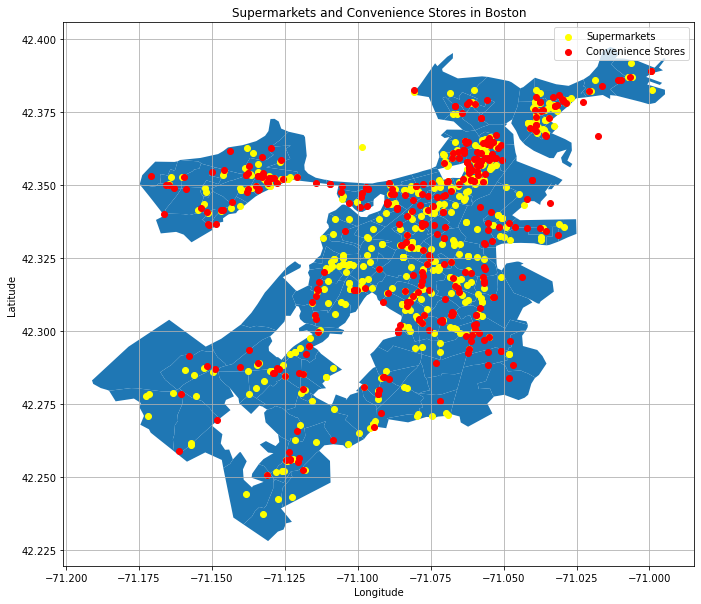

In [18]:
## 
ax = suffolk_county_shape.plot(figsize = (25,10))
boston_supermarkets_gdf.plot(ax = ax, label = "Supermarkets", color = "yellow")
boston_convenience_gdf.plot(ax = ax, label = "Convenience Stores", color = "red")

plt.title("Supermarkets and Convenience Stores in Boston")
plt.grid(True)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")


# Step 12: Plot Graph

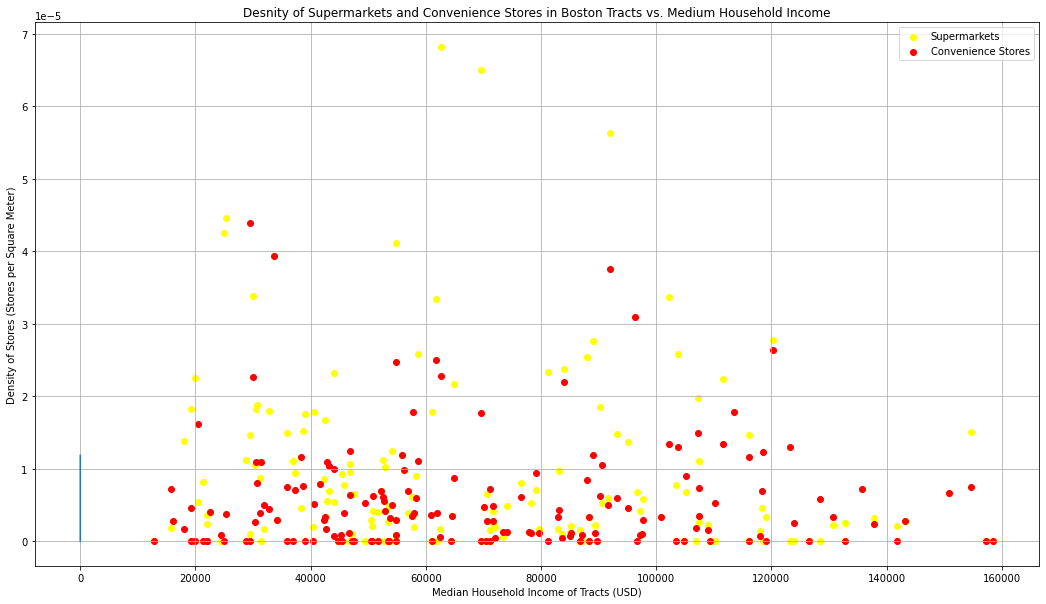

In [19]:
##
import numpy as np

x_data1 = suffolk_supermarkets["Median Household Income"].astype(float)
y_data1 = suffolk_supermarkets["Density"].astype(float)

x_data2 = suffolk_convenience["Median Household Income"].astype(float)
y_data2 = suffolk_convenience["Density"].astype(float)

plt.figure(figsize = (18, 10))
plt.scatter(x_data1, y_data1, label = "Supermarkets", c = "yellow")
plt.scatter(x_data2, y_data2, label = "Convenience Stores", c = "red")

plt.title("Desnity of Supermarkets and Convenience Stores in Boston Tracts vs. Medium Household Income")
plt.xlabel("Median Household Income of Tracts (USD)")
plt.ylabel("Density of Stores (Stores per Square Meter)")
plt.legend()
plt.grid(True)

line1 = np.polyfit(x_data1, y_data1, 1)
plt.plot(line1)

plt.show()
